# Machine Learning Project
### Given various stats on NBA players can I predict their average salary

Let's look at this data

In [24]:
import pandas as pd

data_frame = pd.read_csv("nba_contracts_history.csv")
print(data_frame.keys())
data_frame.head(n=10)

Index(['NAME', 'CONTRACT_START', 'CONTRACT_END', 'AVG_SALARY', 'AGE', 'GP',
       'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',
       '+/-'],
      dtype='object')


,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,Wesley Matthews,2019,2020,2564753.0,32.0,69.0,27.0,42.0,2091.0,840.0,...,81.0,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0
1,Brook Lopez,2015,2017,21165675.0,27.0,72.0,34.0,38.0,2100.0,1236.0,...,81.4,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0
2,DeAndre Jordan,2011,2014,10759763.5,22.0,80.0,31.0,49.0,2047.0,566.0,...,45.2,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0
3,Markieff Morris,2015,2018,8143323.5,25.0,82.0,39.0,43.0,2581.0,1258.0,...,76.3,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0
4,Dwight Howard,2018,2019,13410739.0,32.0,81.0,35.0,46.0,2463.0,1347.0,...,57.4,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0
5,Austin Rivers,2015,2016,7055398.0,22.0,76.0,46.0,30.0,1563.0,530.0,...,67.5,27.0,125.0,152.0,155.0,65.0,48.0,14.0,146.0,-128.0
6,Wayne Ellington,2016,2017,6135000.0,28.0,76.0,18.0,58.0,1615.0,586.0,...,85.7,20.0,154.0,174.0,83.0,45.0,48.0,5.0,82.0,-322.0
7,JaMychal Green,2019,2020,4767000.0,29.0,65.0,31.0,34.0,1371.0,611.0,...,79.2,104.0,305.0,409.0,50.0,87.0,45.0,34.0,193.0,-214.0
8,Kyle O'Quinn,2015,2018,4051312.5,25.0,51.0,15.0,36.0,824.0,294.0,...,77.2,46.0,153.0,199.0,59.0,55.0,31.0,39.0,110.0,-123.0
9,Trevor Ariza,2014,2017,8000000.0,28.0,77.0,41.0,36.0,2723.0,1107.0,...,77.2,99.0,376.0,475.0,191.0,132.0,126.0,20.0,179.0,196.0


I will have plenty of data to go off of and looks like everything is a neat format.

In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            199 non-null    object 
 1   CONTRACT_START  199 non-null    int64  
 2   CONTRACT_END    199 non-null    int64  
 3   AVG_SALARY      199 non-null    float64
 4   AGE             199 non-null    float64
 5   GP              199 non-null    float64
 6   W               199 non-null    float64
 7   L               199 non-null    float64
 8   MIN             199 non-null    float64
 9   PTS             199 non-null    float64
 10  FGM             199 non-null    float64
 11  FGA             199 non-null    float64
 12  FG%             199 non-null    float64
 13  3PM             199 non-null    float64
 14  3PA             199 non-null    float64
 15  3P%             199 non-null    float64
 16  FTM             199 non-null    float64
 17  FTA             199 non-null    flo

In [17]:
data_frame.describe()

,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,FGM,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
count,199.000000,199.000000,1.990000e+02,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,2015.241206,2017.507538,1.107361e+07,25.934673,64.170854,34.216080,29.954774,1746.984925,813.447236,300.396985,...,74.027136,79.346734,248.984925,328.331658,171.673367,103.386935,58.190955,39.633166,137.668342,62.874372
std,2.065129,1.705219,7.897820e+06,2.842810,19.573765,14.485749,13.019526,782.413267,499.930031,178.629457,...,14.982895,72.709644,164.023325,226.106193,163.872237,70.889201,37.306859,43.348845,64.277732,227.681794
min,2011.000000,2013.000000,8.232440e+05,20.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-628.000000
25%,2014.000000,2016.000000,4.767000e+06,24.000000,59.000000,25.000000,20.500000,1246.500000,443.500000,166.500000,...,71.100000,27.000000,129.000000,164.500000,74.000000,55.000000,34.500000,11.000000,97.500000,-83.500000
50%,2015.000000,2018.000000,9.500000e+06,25.000000,72.000000,35.000000,31.000000,1867.000000,734.000000,277.000000,...,76.800000,51.000000,209.000000,286.000000,110.000000,85.000000,48.000000,23.000000,137.000000,44.000000
75%,2017.000000,2019.000000,1.638890e+07,28.000000,78.000000,45.000000,39.000000,2372.000000,1154.000000,427.500000,...,82.450000,112.500000,364.000000,469.500000,211.000000,138.000000,77.500000,51.000000,181.500000,174.000000
max,2019.000000,2020.000000,3.359950e+07,36.000000,82.000000,64.000000,62.000000,3125.000000,2376.000000,743.000000,...,100.000000,397.000000,829.000000,1226.000000,839.000000,374.000000,169.000000,269.000000,291.000000,839.000000


array([[<Axes: title={'center': 'CONTRACT_START'}>,
        <Axes: title={'center': 'CONTRACT_END'}>,
        <Axes: title={'center': 'AVG_SALARY'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'GP'}>],
       [<Axes: title={'center': 'W'}>, <Axes: title={'center': 'L'}>,
        <Axes: title={'center': 'MIN'}>, <Axes: title={'center': 'PTS'}>,
        <Axes: title={'center': 'FGM'}>],
       [<Axes: title={'center': 'FGA'}>, <Axes: title={'center': 'FG%'}>,
        <Axes: title={'center': '3PM'}>, <Axes: title={'center': '3PA'}>,
        <Axes: title={'center': '3P%'}>],
       [<Axes: title={'center': 'FTM'}>, <Axes: title={'center': 'FTA'}>,
        <Axes: title={'center': 'FT%'}>,
        <Axes: title={'center': 'OREB'}>,
        <Axes: title={'center': 'DREB'}>],
       [<Axes: title={'center': 'REB'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'TOV'}>, <Axes: title={'center': 'STL'}>,
        <Axes: title={'center': 'BLK'}>],
       [<A

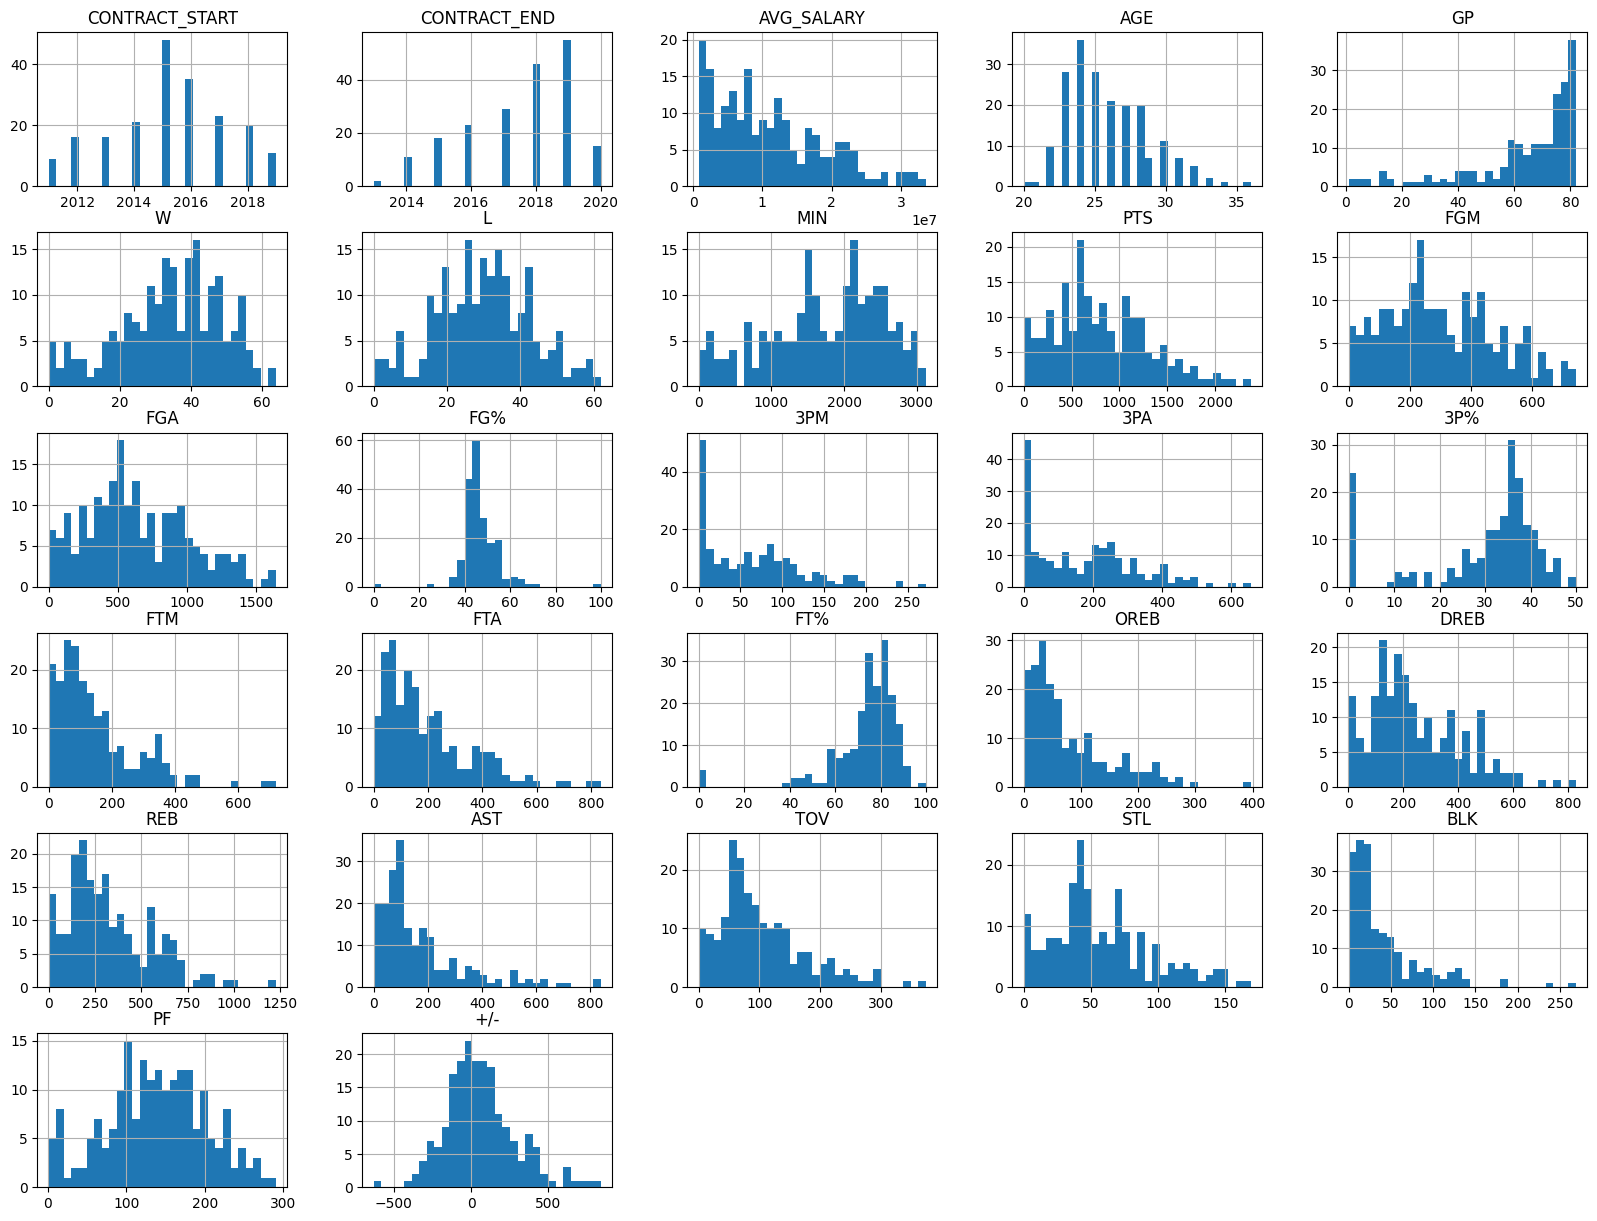

In [18]:
import matplotlib.pyplot as plt

data_frame.hist(bins=30, figsize=(20,15))

array([[<Axes: xlabel='AVG_SALARY', ylabel='AVG_SALARY'>,
        <Axes: xlabel='PTS', ylabel='AVG_SALARY'>,
        <Axes: xlabel='MIN', ylabel='AVG_SALARY'>,
        <Axes: xlabel='FGA', ylabel='AVG_SALARY'>],
       [<Axes: xlabel='AVG_SALARY', ylabel='PTS'>,
        <Axes: xlabel='PTS', ylabel='PTS'>,
        <Axes: xlabel='MIN', ylabel='PTS'>,
        <Axes: xlabel='FGA', ylabel='PTS'>],
       [<Axes: xlabel='AVG_SALARY', ylabel='MIN'>,
        <Axes: xlabel='PTS', ylabel='MIN'>,
        <Axes: xlabel='MIN', ylabel='MIN'>,
        <Axes: xlabel='FGA', ylabel='MIN'>],
       [<Axes: xlabel='AVG_SALARY', ylabel='FGA'>,
        <Axes: xlabel='PTS', ylabel='FGA'>,
        <Axes: xlabel='MIN', ylabel='FGA'>,
        <Axes: xlabel='FGA', ylabel='FGA'>]], dtype=object)

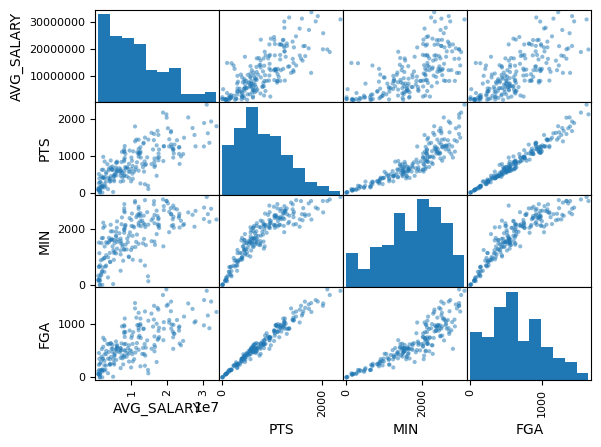

In [28]:
working_set = data_frame.copy()

# we do scatter plots first
from pandas.plotting import scatter_matrix

compare = ['AVG_SALARY', 'PTS', 'MIN', 'FGA']
scatter_matrix(working_set[compare])

We get to see some nice correlation here with salary, points and minutes played which gives me hope of prediction

0      False
1      False
2      False
3      False
4      False
       ...  
194     True
195    False
196     True
197    False
198    False
Name: MIN, Length: 199, dtype: bool
[840.0 1236.0 566.0 1258.0 1347.0 -- -- -- -- 1107.0 1786.0 -- -- -- --
 867.0 -- 1344.0 -- -- 1275.0 1046.0 618.0 1323.0 -- -- 938.0 -- 689.0 --
 -- 1178.0 1057.0 -- -- 1432.0 1583.0 748.0 -- -- -- -- -- 1737.0 -- --
 872.0 976.0 1246.0 -- 1661.0 1249.0 1413.0 -- 946.0 1248.0 -- -- --
 1301.0 1107.0 -- -- -- -- -- -- -- 1085.0 1135.0 -- 1878.0 -- 1228.0
 1164.0 -- -- 1163.0 -- 2029.0 625.0 1558.0 1254.0 946.0 -- -- 1117.0
 956.0 2376.0 -- -- 842.0 1383.0 1296.0 -- -- 1218.0 965.0 -- 1792.0
 1113.0 2112.0 826.0 -- -- -- -- -- 1417.0 946.0 -- 1225.0 1186.0 -- -- --
 1601.0 -- -- 1440.0 -- -- -- -- -- 774.0 -- 1166.0 -- 1040.0 1628.0 -- --
 -- -- -- -- 1432.0 1173.0 -- -- 1045.0 -- 1100.0 -- 771.0 -- -- 693.0 --
 1055.0 -- 1920.0 -- 859.0 1145.0 2023.0 810.0 -- 1614.0 -- -- -- --
 1743.0 -- -- -- -- 1055.0 -- 63

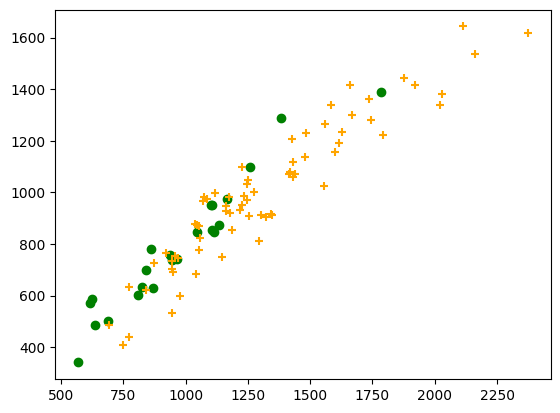

In [29]:
import matplotlib.pyplot as plt
import numpy as np

#Filter by minutes played hopefully starters or key players
key_players = np.ma.masked_where(data_frame["MIN"]<=2000, data_frame['PTS'])
print(data_frame["MIN"]<=2000)
print(key_players)
#Split into offensive and defensive players
less = np.ma.masked_where(data_frame["AVG_SALARY"]>11073610, key_players)
more = np.ma.masked_where(data_frame["AVG_SALARY"]<11073610, key_players)
plt.scatter(x=less, y=data_frame["FGA"], marker="o", c="green") 
plt.scatter(x=more, y=data_frame["FGA"], marker="+", c="orange") 
plt.show()

There must be some players who are defensive players who still have big contracts but there is a correlation to points attempted and scored with money made.

### Splitting the data

In [35]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_frame, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())
print(test_set["AGE"].value_counts())
print(train_set["AGE"].value_counts())

159 40
                 NAME  CONTRACT_START  CONTRACT_END  AVG_SALARY   AGE    GP  \
188        Marc Gasol            2011          2014  14375941.0  26.0  81.0   
33       JaVale McGee            2012          2015  11317741.0  24.0  61.0   
23      Julius Randle            2018          2019  13320500.0  23.0  82.0   
179  Danilo Gallinari            2015          2017  16536533.0  26.0  59.0   
41        Cory Joseph            2015          2018   7472500.0  23.0  79.0   

        W     L     MIN     PTS  ...   FT%   OREB   DREB    REB    AST    TOV  \
188  46.0  35.0  2586.0   951.0  ...  74.8  154.0  415.0  569.0  200.0  146.0   
33   22.0  39.0  1535.0   691.0  ...  46.1  163.0  314.0  477.0   31.0   87.0   
23   35.0  47.0  2190.0  1323.0  ...  71.8  181.0  473.0  654.0  210.0  213.0   
179  23.0  36.0  1426.0   734.0  ...  89.5   31.0  187.0  218.0   83.0   57.0   
41   53.0  26.0  1444.0   535.0  ...  73.4   44.0  148.0  192.0  188.0   67.0   

      STL    BLK     PF    +/- 